In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score,cohen_kappa_score, matthews_corrcoef
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
# Add column names to the dataset
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 
                'asymmetry', 'length_of_kernel_groove', 'seed_type']
data.columns = column_names

X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry,length_of_kernel_groove,seed_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Accuracy: 0.943
Precision: 0.939
Recall: 0.944
F1 Score: 0.941
Cohen's Kappa: 0.914
Matthews Correlation Coefficient: 0.915
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       1.00      1.00      1.00        18
           3       0.95      0.90      0.93        21

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



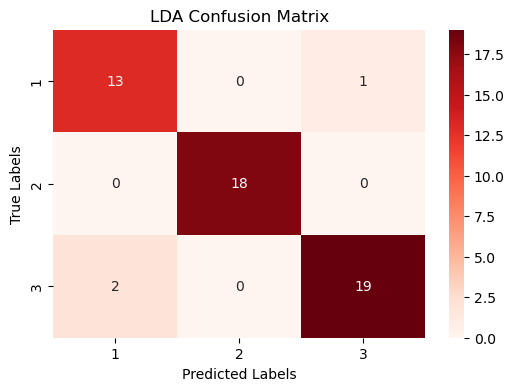

In [2]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis()
# Train the LDA classifier
lda.fit(X_train, y_train)
# Predict the test set
y_pred_lda = lda.predict(X_test)

# Calculate the confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lda)
# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_lda, average='macro')
recall = recall_score(y_test, y_pred_lda, average='macro')
f1 = f1_score(y_test, y_pred_lda, average='macro')
# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred_lda)
# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_lda)

# Print all the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Cohen's Kappa: {kappa:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}")

# Print classification report
print(classification_report(y_test, y_pred_lda))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Reds',
            xticklabels=np.unique(y_test, return_counts=False),
            yticklabels=np.unique(y_test, return_counts=False))
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

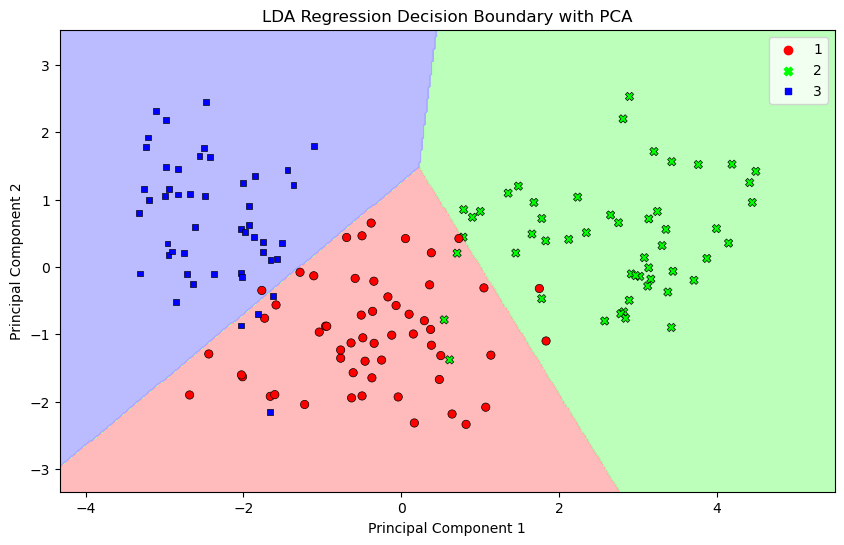

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import zero_one_loss, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Predict the test set
y_pred_lda = lda.predict(X_test_pca)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Define a grid to plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class of grid points
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot the training points
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, style=y_train, palette=cmap_bold, alpha=1.0, edgecolor="black")

# Set the title and labels for the axes
plt.title('LDA Regression Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()